## Exploratory Data Analysis

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_excel("cleaned_zomato_data.xlsx")
print(data.head(2))

   Order ID  Order Amount (INR)  Delivery Time (mins) Order Date  Rating  \
0         1                1930                    32 2023-04-30     4.6   
1         2                 371                    84 2023-01-06     2.7   

   Number of Items  Delivery Distance (km)  Delivery Agent ID Order Status  \
0                9                9.200017                995    cancelled   
1                1                8.175074                941    cancelled   

  Payment Method  ...  average_cost_for_two price_range  \
0     debit card  ...                   200           1   
1            upi  ...                  1000           3   

                                          highlights  aggregate_rating votes  \
0  ['credit card', 'delivery', 'takeaway availabl...               0.0     3   
1  ['cash', 'takeaway available', 'breakfast', 'n...               3.6    32   

  photo_count opentable_support delivery          state    area  
0           0               0.0        0         ke

In [68]:
print(data.columns)

Index(['Order ID', 'Order Amount (INR)', 'Delivery Time (mins)', 'Order Date',
       'Rating', 'Number of Items', 'Delivery Distance (km)',
       'Delivery Agent ID', 'Order Status', 'Payment Method',
       'Tip Amount (INR)', 'Promo Code Applied', 'Has Free Delivery', 'res_id',
       'name', 'type', 'address', 'city', 'locality', 'latitude', 'longitude',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'highlights', 'aggregate_rating', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'state', 'area'],
      dtype='object')


## What are the top cities by number of orders?
#### → Helps understand market presence and delivery density.

          city  Order Amount (INR)
11     chennai             1248447
48      mumbai             1152106
7   aurangabad             1011308
8    bangalore              762978
58        pune              637846
..         ...                 ...
15   faridabad               28109
66    srinagar               26498
71       udupi               22595
18   ghaziabad               20139
25      howrah               16202

[76 rows x 2 columns]


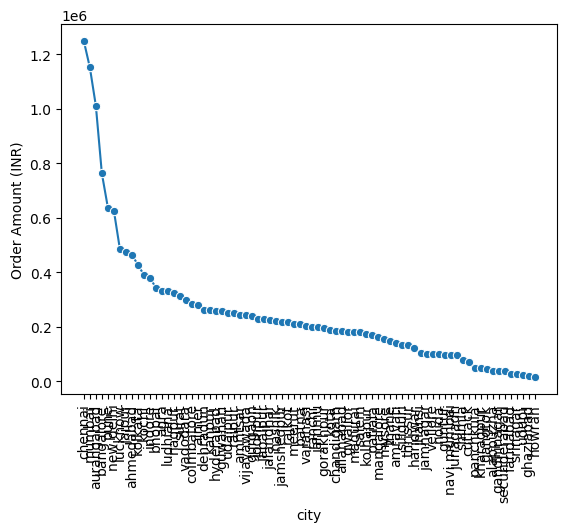

In [69]:
grouped_by_cities = data.groupby("city")["Order Amount (INR)"].sum().reset_index()
grouped_by_cities = grouped_by_cities.sort_values(by="Order Amount (INR)", ascending=False)
print(grouped_by_cities)
sns.lineplot(data=grouped_by_cities, x="city", y="Order Amount (INR)", marker="o")
plt.xticks(rotation=90)
plt.show()

# Recommendation:
# Focus marketing and delivery infrastructure investments in high-order cities like chennai to maximize revenue impact.



## What time of day do most orders happen?

# Recommendation:
Optimize staff allocation and delivery fleet during peak order times to ensure timely service.

                                                timings  Order ID  \
269                                      11 am to 11 pm      1672   
34                                       10 am to 10 pm       324   
47                                       10 am to 11 pm       299   
251                                      11 am to 10 pm       287   
697                                    12 noon to 11 pm       209   
...                                                 ...       ...   
2024           mon-sun (12 noon to 4 pm, 7 pm to 11 pm)         1   
2020                      mon-sun (12 noon to 11:45 pm)         1   
18                                     1 pm to 11:45 pm         1   
17    1 pm to 11:30 pm (tue-thu, sun), 1 pm to 1 am ...         1   
16                           1 pm to 11:30 pm (mon-sun)         1   

      Order Amount (INR)  Delivery Time (mins)  Order Date  Rating  \
269                 1672                  1672        1672    1672   
34                   324       

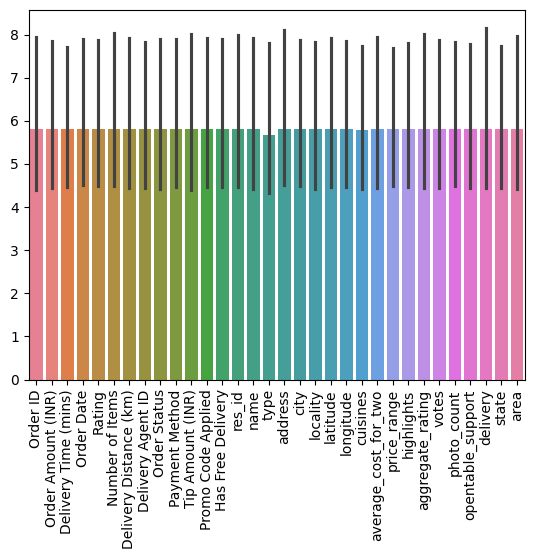

In [70]:
grouped_by_time = data.groupby("timings").count().reset_index()
print(grouped_by_time.sort_values(by="Order ID",ascending=False))
sns.barplot(grouped_by_time)
plt.xticks(rotation=90)
plt.show()

## How does delivery time vary by city or area?
#### → Highlights potential service bottlenecks or traffic-heavy zones.


Recommendation:
Identify and resolve delivery bottlenecks in cities with higher average delivery times to improve customer satisfaction.


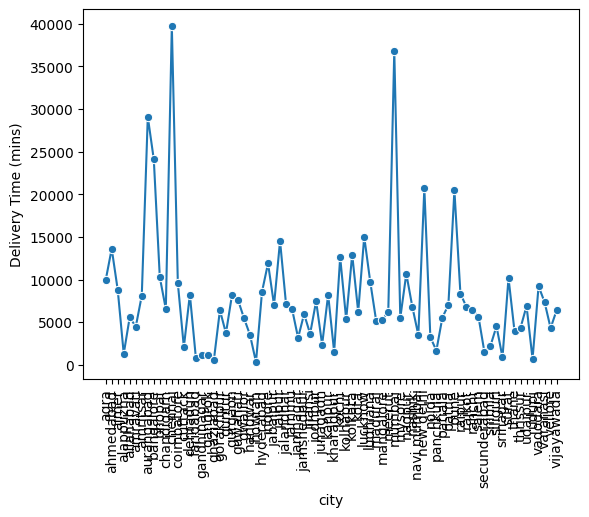

In [71]:
grouped_by_delivery = data.groupby("city")["Delivery Time (mins)"].sum().reset_index()
sns.lineplot(data=grouped_by_delivery, x="city",y="Delivery Time (mins)",marker="o")
plt.xticks(rotation=90)
plt.show()

## What time of day has the highest average order amount?
#### → Insights into peak-time revenue generation.

Recommendation:
Launch premium meal deals or loyalty rewards during 7am–12noon to capitalize on high-spending customers.

In [72]:
grouped_by_order_amount = data.groupby("timings")["Order Amount (INR)"].mean().reset_index()
grouped_by_order_amount = grouped_by_order_amount.sort_values(by="Order Amount (INR)",ascending=False)
print(grouped_by_order_amount)

# timings                          Order Amount (INR)
#  7am – 12noon (Mon-Sun)              2998.0

# the timings 7am - 12noon (Mon-Sun) has the highest Average Order Amount of 2998.0.

                                                timings  Order Amount (INR)
1610                             7am – 12noon (mon-sun)              2998.0
1865           9 pm to 5 am (tue-sat), mon & sun closed              2997.0
1399                                6:30 pm to 11:30 pm              2995.0
1179  3 pm to 11 pm (mon-thu), 12 noon to 11 pm (fri...              2986.0
1987  mon, wed-sun (1 pm to 11 pm), tue (6 pm to 10 pm)              2978.0
...                                                 ...                 ...
1627                                7pm – 7am (mon-sun)               159.0
346                  11 am to 3:30 pm, 5:30 pm to 11 pm               158.0
1062  12noon – 3:30pm, 7pm – 12midnight (mon-sat),12...               158.0
709   12 noon to 11:30 pm (mon-thu), 12 noon to 12:3...               151.0
1296                                    5:30 pm to 1 am               151.0

[2046 rows x 2 columns]


## How do tip amounts vary across days of the week or time of day?
#### → Shows user generosity trends and delivery satisfaction signals.

Recommendation:
Introduce targeted offers on Mondays and Tuesdays to boost order volume and leverage natural tipping behavior.

In [73]:
# Convert Order Date column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
# grouped_by_tip_amount = data.groupby()
data["Day_of_Week"] = data['Order Date'].dt.day_name()


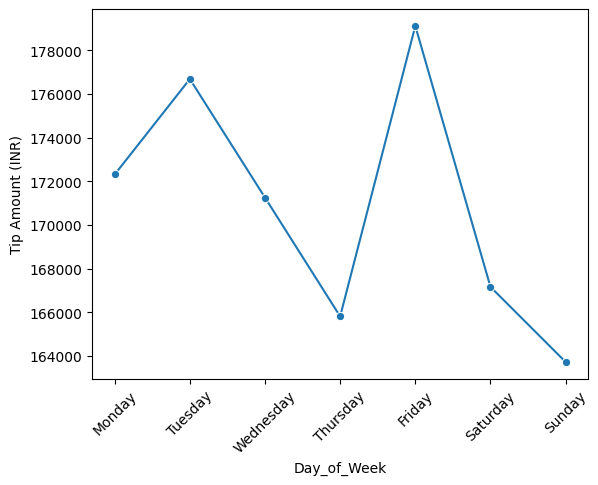

'\n\nAcross Days of week if you see we have highest tip amount on \nfriday then the second highest on tuesday and third highest on monday.\n\nso it might lead to as friday is generally the start of weekend in india i.e\npeople working do get the next two days as holidays so on friday night they \norder much more hence the tips are high and then on monday and tuesday \nthe reason might be that monday is starting people are lazy and same goes on tuesday too. \nso, if we offer good discounts on moday then the people might order much more and tip more\nand regarding rest of the days we can put down an offer for them to match the prices on mondays\nor lower down the prices on these days a but which might let them to order and tip more.\n\n'

In [74]:


# First create a mapping for days of week
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Extract day of week number and map to names
data['Day_of_Week_Number'] = data['Order Date'].dt.dayofweek
data['Day_of_Week'] = data['Day_of_Week_Number'].map(day_mapping)

# Group by both Day_of_Week and Day_of_Week_Number to maintain the order
grouped_by_days_of_week = data.groupby(["Day_of_Week", "Day_of_Week_Number"])["Tip Amount (INR)"].sum().reset_index()
grouped_by_days_of_week = grouped_by_days_of_week.sort_values(by="Day_of_Week_Number")

# Create the line plot
sns.lineplot(data=grouped_by_days_of_week, x="Day_of_Week", y="Tip Amount (INR)", marker="o")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

"""

Across Days of week if you see we have highest tip amount on 
friday then the second highest on tuesday and third highest on monday.

so it might lead to as friday is generally the start of weekend in india i.e
people working do get the next two days as holidays so on friday night they 
order much more hence the tips are high and then on monday and tuesday 
the reason might be that monday is starting people are lazy and same goes on tuesday too. 
so, if we offer good discounts on moday then the people might order much more and tip more
and regarding rest of the days we can put down an offer for them to match the prices on mondays
or lower down the prices on these days a but which might let them to order and tip more.

"""




                                                timings  Tip Amount (INR)
0     (mon, tue, thu, fri, sat, sun), 12:5am – 12mid...               534
1                         (mon-sat),11am – 12:5pm (sun)                29
2                                             (mon-sun)                15
3                                               1 pm to               161
4                                          1 pm to 1 am               900
...                                                 ...               ...
2041                             mon-sun (9 am to 1 am)               374
2042                       mon-sun (9:30 am to 3:30 pm)                55
2043  mon-thu (11:30 am to 11:30 pm), fri-sun (11:30...                56
2044  mon-thu (12 noon to 11:59 pm), fri-sun (12 noo...                99
2045  mon-thu, sun (10 am to 11 pm), fri-sat (10 am ...                28

[2046 rows x 2 columns]


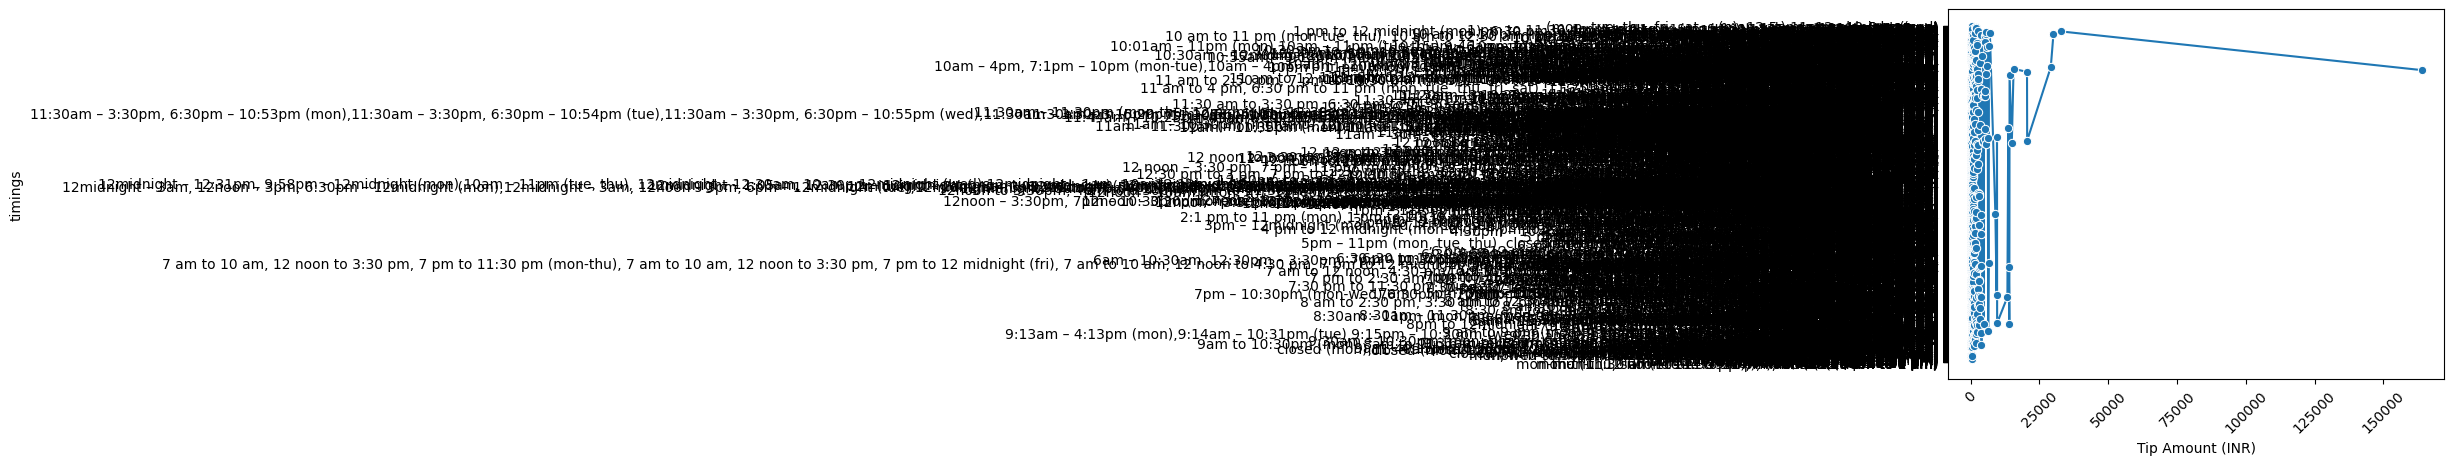

In [75]:
grouped_by_time = data.groupby("timings")["Tip Amount (INR)"].sum().reset_index()
print(grouped_by_time)

# Sort by timings to get a logical order
grouped_by_time = grouped_by_time.sort_values("timings")

sns.lineplot(data = grouped_by_time, x = "Tip Amount (INR)", y = "timings", marker = "o")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Do promo codes significantly increase the order amount?
#### → Helps assess promo effectiveness on revenue lift.

Recommendation:
Reassess current promo code strategy, as it shows limited impact on increasing order value.

  Promo Code Applied  Order Amount (INR)
0                 no             9353851
1                yes             9720380


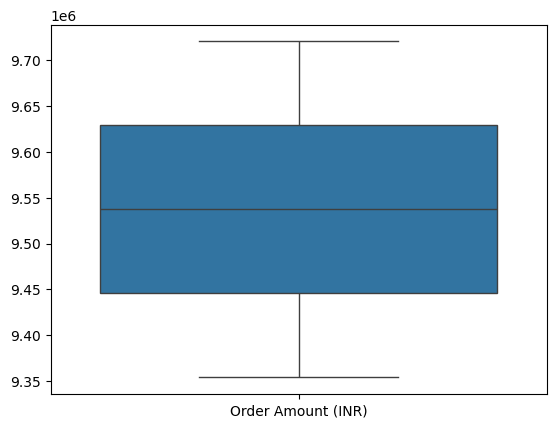

In [76]:
grouped_by_promo_code = data.groupby("Promo Code Applied")["Order Amount (INR)"].sum().reset_index()
print(grouped_by_promo_code)

sns.boxplot(grouped_by_promo_code)
plt.show()

# Yes promo codes do make a significant difference. just a small difference of  4 lakhs

## Which types of restaurants (e.g., casual, fine dining) receive higher ratings?
#### → Indicates quality perception across restaurant categories

Recommendation:
Prioritize onboarding and promoting highly-rated formats like Irani Cafes and Fine Dining for quality assurance.

In [77]:
grouped_by_restraunts = data.groupby("type")["Rating"].mean().reset_index()
grouped_by_restraunts = grouped_by_restraunts.sort_values(by="Rating",ascending=False)
print(grouped_by_restraunts)
# Irani cafe receives the highest ratings.


               type    Rating
15       irani cafe  3.600000
12      fine dining  3.130909
9     confectionery  3.120000
18             mess  3.116495
16            kiosk  3.097468
14       food truck  3.052941
21              pub  3.030667
22      quick bites  3.030047
17           lounge  3.025521
13       food court  3.014907
1               bar  3.013871
0            bakery  3.007953
4      butcher shop  3.007407
5              café  3.006531
6     casual dining  3.004265
24       sweet shop  2.984570
2     beverage shop  2.982819
3        bhojanalya  2.893431
10  dessert parlour  2.884605
11            dhaba  2.854297
19     microbrewery  2.818750
20        paan shop  2.728235
7              club  2.665217
8      cocktail bar  2.050000
23            shack  1.800000


## Does delivery distance affect delivery time and tip amount?
#### → Useful for operational planning and delivery agent optimization.

Recommendation:
Optimize delivery routes and limit long-distance orders to reduce delivery time and improve tip satisfaction.

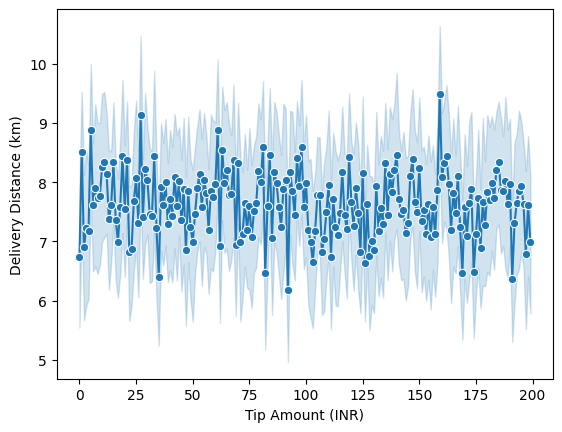

In [78]:
grouped_by_Distance = data.groupby("Delivery Distance (km)")[["Tip Amount (INR)", "Delivery Time (mins)"]].mean().reset_index()
# print(grouped_by_Distance)

sns.lineplot(data=grouped_by_Distance, x = "Tip Amount (INR)", y = "Delivery Distance (km)", marker="o")
plt.show()

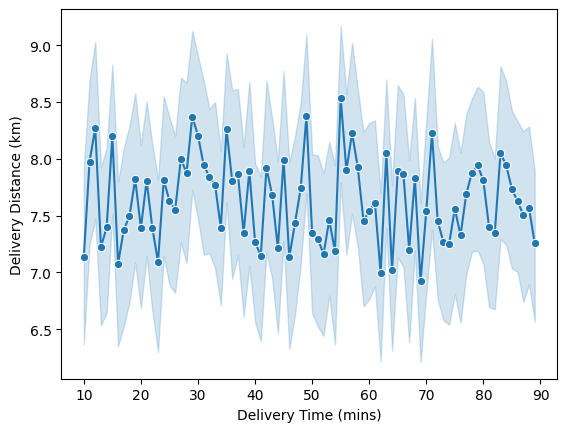

In [79]:
grouped_by_Distance = data.groupby("Delivery Distance (km)")[["Tip Amount (INR)", "Delivery Time (mins)"]].mean().reset_index()
sns.lineplot(data=grouped_by_Distance, x = "Delivery Time (mins)", y = "Delivery Distance (km)", marker="o")
plt.show()

## What are the most common cuisines in top-ordering cities?
#### → Aligns with regional food preferences and demand patterns.

✅ 9. Common Cuisines in Top Cities
Recommendation:
Feature top cuisines like North Indian and Chinese in high-order cities to align with regional preferences.

Sample of cuisines column:
0                                bakery
1    chinese, continental, north indian
2                   desserts, ice cream
3    raw meats, fast food, north indian
4             north indian, continental
Name: cuisines, dtype: object


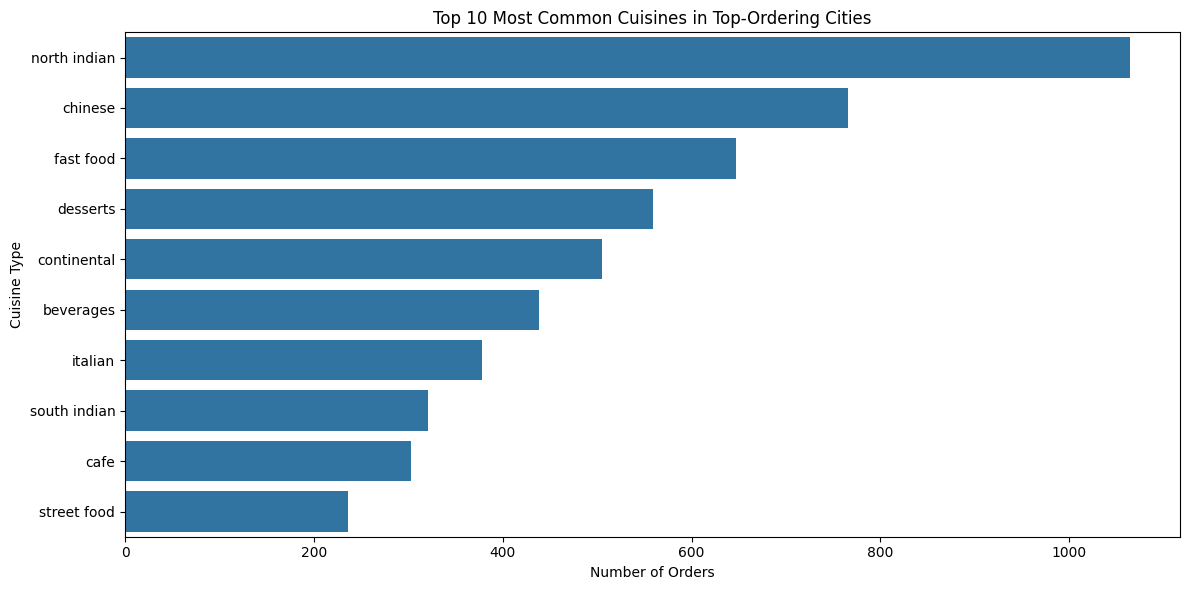


Top 10 Most Common Cuisines in Top-Ordering Cities:


In [80]:
# First, let's find the top cities by number of orders
top_cities = data.groupby('city')['Order ID'].count().sort_values(ascending=False).head(5).index

# Filter data for top cities
top_cities_data = data[data['city'].isin(top_cities)]

# Split cuisines (since they might be in a list/string format) and count their occurrences
# First, let's check how cuisines are stored
print("Sample of cuisines column:")
print(data['cuisines'].head())

# Assuming cuisines are stored as comma-separated strings, we'll split them
cuisine_counts = top_cities_data['cuisines'].str.split(',').explode().str.strip()
cuisine_counts = cuisine_counts.value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 10 Most Common Cuisines in Top-Ordering Cities')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()

# Print the results
print("\nTop 10 Most Common Cuisines in Top-Ordering Cities:")
# print(cuisine_counts)

## How do price ranges of restaurants relate to their ratings and number of votes?
#### → Helps identify whether expensive places are actually liked more.

Recommendation:
Highlight high-priced, high-rated restaurants in premium user segments to increase trust and conversions.

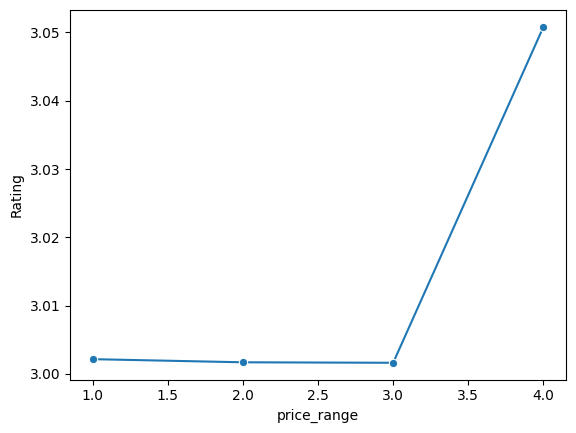

In [81]:
grouped_by_price = data.groupby("price_range")[["Rating","votes"]].mean().reset_index()
# print(grouped_by_price.sort_values(by="Rating", ascending=False))

sns.lineplot(data = grouped_by_price, x = "price_range", y = "Rating", marker="o")
plt.show()

# Restraunts having high price range are having more ratings which means that higher rates are being justified by the restraunts
# the customers are satisfied by their price and their facilities. on the other hand 
# restraunts having lower price range has less rating compared to the higher price range one 
# the ratings they have on average is around 3 which shows satisfactory performance neither too good nor bad.

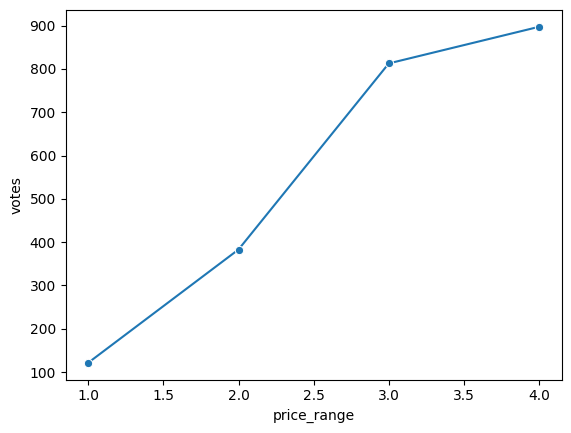

In [82]:
sns.lineplot(data = grouped_by_price, x = "price_range", y = "votes", marker="o")
plt.show()

# Similar to ratings here also votes are given more to the restraunts with higher price range
# on an average they have got 900 votes while the other having less price range has less votes too. 

## What is the relationship between free delivery and order amount/tip/rating?
#### → Explores if offering free delivery encourages larger or more appreciated orders.

Recommendation:
Offer free delivery strategically, as it boosts order amount, tips, and customer ratings significantly.

  Has Free Delivery  Order Amount (INR)  Tip Amount (INR)    Rating
0                no         1578.904982         98.297097  2.995925
1               yes         1579.343360         99.752534  3.012797


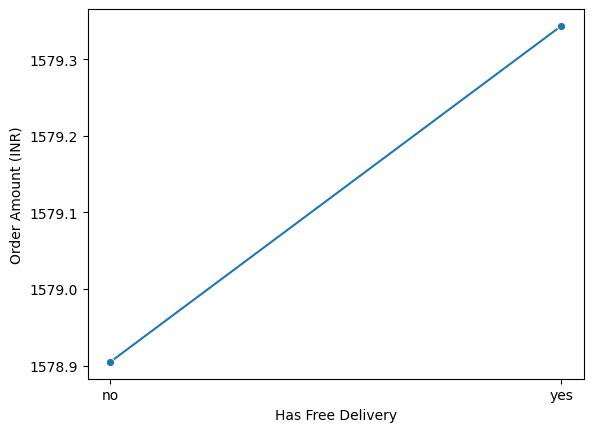

In [83]:
grouped_by_free_Delivery =  data.groupby("Has Free Delivery")[["Order Amount (INR)","Tip Amount (INR)","Rating"]].mean().reset_index()
print(grouped_by_free_Delivery)

sns.lineplot(data = grouped_by_free_Delivery, x = "Has Free Delivery", y="Order Amount (INR)", marker="o")
plt.show()

# Yes the relation between free delivery and ORder Amount is : When there is free Delivery 
# the Orders are much more as you can see that the order Amount graph is going up. 

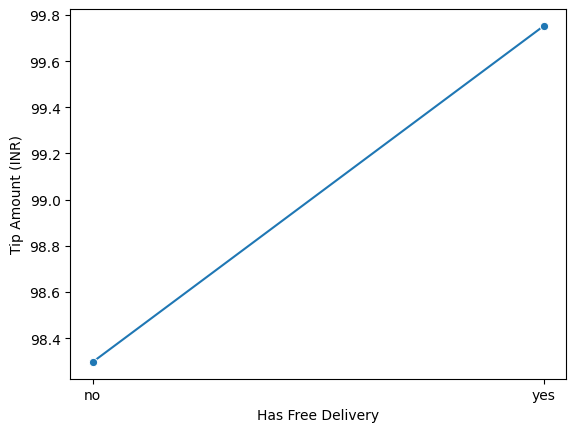

In [84]:
sns.lineplot(data = grouped_by_free_Delivery, x = "Has Free Delivery", y="Tip Amount (INR)", marker="o")
plt.show()

# Same as the order Amount on an Average the tip amount also goes up 
# when there is free delivery given to the customers. 
# It is not a big difference but still even one penny can help the business grow.

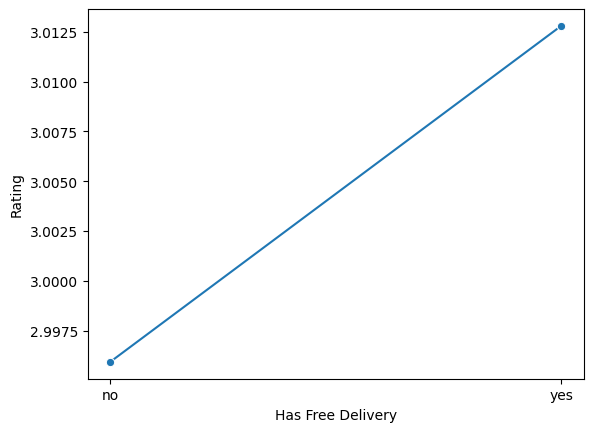

In [85]:
sns.lineplot(data = grouped_by_free_Delivery, x = "Has Free Delivery", y="Rating", marker="o")
plt.show()

# Same like the order amount and tip amount the rating also goes up 
# when there is free delivery provided to the consumer.
# That has drastically increased as the one having no delivery has 2.8 as their avg rating 
# while the one  having free delivery goes upto oan avg of 3.2 rating.
